In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Read the data
red = pd.read_csv('winequality-red.csv', sep = ';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(red.shape)

(1599, 12)


In [4]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Search for missing values
print(red.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# Get column names
col_red_names = red.columns
print(col_red_names)
# Get column data types
print(red.dtypes)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
correlations = red.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


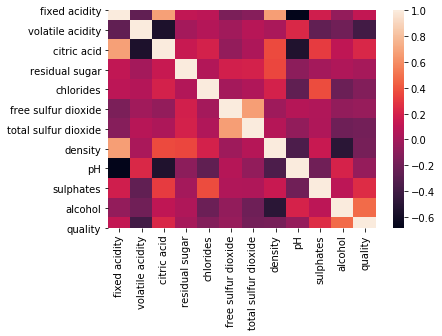

In [8]:
sns.heatmap(red.corr())
plt.show()

In [11]:
# Separate target from training features

y = red.quality
x = red.drop('quality', axis=1)

In [12]:
# Split data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [13]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)
  
# this gives the coefficients of the 10 features selected above.  
print(regressor.coef_)

[ 2.32736478e-02 -9.91535569e-01 -1.41267594e-01  8.11925585e-03
 -1.59192407e+00  5.50005690e-03 -3.54198549e-03 -6.06916616e+00
 -4.06325022e-01  8.23603060e-01  2.94180891e-01]


In [14]:
# To predict the quality of wine with this model

train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[5.33390209 5.33458216 5.94987004 ... 6.39109929 6.20184044 5.27719203]
[5.09908272 5.65580865 5.90927233 6.13810421 5.00495043 5.44066916
 5.05213654 6.15418124 5.52055599 5.77519663 5.61796132 5.23498287
 5.23127869 5.31466808 6.46439345 5.04000017 5.85280918 5.19300859
 6.0919118  6.34255254 6.41600994 5.52588684 5.80534686 4.93255733
 5.16159004 5.48207651 5.13834113 6.59480979 5.89478275 5.73709
 6.09133736 6.29529369 4.91616391 5.88376873 5.10515437 5.96400538
 6.80732578 5.03724291 5.25485064 5.88376873 5.17431803 4.84899008
 6.4903037  5.40465942 5.30375415 5.83513199 5.70825368 5.23988973
 5.24870634 5.46267267 5.08516492 5.61701512 6.01804854 6.32751521
 5.4628648  5.36127481 5.10151339 4.92009423 5.2240759  5.08722001
 4.79258875 5.43567381 5.25054561 5.6798788  5.85050157 6.52603804
 5.37941315 5.71598525 5.16966353 5.98159839 5.63912543 5.6004759
 5.74068429 5.22739422 5.98184324 5.51332746 5.40647057 5.68342011
 5.64578506 5.73709    6.23278066 5.29710528 4.66398697 6.042

In [17]:
# calculating rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)



0.6524682504422629
0.6269476348621655


In [18]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

[5. 6. 6. 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5.
 5. 5. 5. 7. 6. 6. 6. 6. 5. 6. 5. 6. 7. 5. 5. 6. 5. 5. 6. 5. 5. 6. 6. 5.
 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 5.
 5. 5. 5. 7. 6. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5. 6. 6. 5. 5. 5. 5. 6. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 6. 6. 6. 5. 5. 6. 7. 5. 5.
 6. 5. 6. 6. 7. 5. 5. 5. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5.
 5. 6. 6. 7. 5. 6. 6. 5. 6. 6. 5. 6. 7. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7.
 5. 5. 5. 5. 5. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 7. 5. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 5.
 6. 6. 6. 5. 7. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 5. 5. 6. 5. 6. 5. 5.
 5. 6. 5. 7. 5. 5. 6. 6. 5. 6. 7. 7. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5.
 6. 6. 6. 5. 5. 6. 5. 5. 6. 5. 7. 5. 5. 5. 6. 5. 6.

In [19]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_,x.columns)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.023274
volatile acidity        -0.991536
citric acid             -0.141268
residual sugar           0.008119
chlorides               -1.591924
free sulfur dioxide      0.005500
total sulfur dioxide    -0.003542
density                 -6.069166
pH                      -0.406325
sulphates                0.823603
alcohol                  0.294181
